Analysing Netflix TV Show Trends: Maturity Rating

This notebook will look into the maturity ratings of Netflix TV shows and its evolution since Netflix became a streaming service in 2007. As well as defining the different categories, this notebook will also analyse the trends of maturity ratings, popularity of shows based on maturity ratings as well as its correlations with genres, imdb scores and audience demographics.

In [29]:
# Import Modules/Dependancies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st 
import ast

In [30]:
# Read CSV File
netflix_shows = pd.read_csv("../Nida-Data/Output/netflix_shows.csv")

# Display DataFrame
netflix_shows.head()

,title,release_year,age_certification,runtime,language,genres,production_countries,seasons,imdb_score,imdb_votes
0,Monty Python's Flying Circus,1969,TV-14,30,"English, Arabic, French, German, Italian, Mand...","['comedy', 'european']",['GB'],4.0,8.8,72895.0
1,Monty Python's Fliegender Zirkus,1972,TV-MA,43,"English, German",['comedy'],[],1.0,8.1,2144.0
2,Seinfeld,1989,TV-PG,24,English,['comedy'],['US'],9.0,8.9,302700.0
3,Knight Rider,1982,TV-PG,51,English,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,6.9,33760.0
4,Thomas & Friends,1984,TV-Y,10,"Spanish, French, Chinese, Japanese, English","['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,6.5,4948.0


In [31]:
# Filter DataFrame from 2007 
netflix_years = netflix_shows[(netflix_shows['release_year'] >= 2007)].dropna().reset_index(drop=True)

# Display filtered DataFrame
netflix_years.head()

,title,release_year,age_certification,runtime,language,genres,production_countries,seasons,imdb_score,imdb_votes
0,Breaking Bad,2008,TV-MA,48,"English, Spanish","['drama', 'thriller', 'crime']",['US'],5.0,9.5,1727694.0
1,The Walking Dead,2010,TV-MA,46,English,"['action', 'drama', 'scifi', 'thriller', 'horr...",['US'],11.0,8.2,945125.0
2,Downton Abbey,2010,TV-14,58,English,"['drama', 'romance', 'european']",['GB'],6.0,8.7,197744.0
3,The Great British Baking Show,2010,TV-PG,57,English,"['reality', 'european']",['GB'],12.0,8.6,9564.0
4,Community,2009,TV-PG,23,English,['comedy'],['US'],6.0,8.5,252564.0


In [50]:
# Convert 'genres' column into lists
netflix_years['genres'] = netflix_years['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) 

# Explode the 'genres' column to create a row for each genre associated with a show 
exploded_genres = netflix_years.explode('genres')
 
# Display the DataFrame with exploded genres 
exploded_genres.head()

,title,release_year,age_certification,runtime,language,genres,production_countries,seasons,imdb_score,imdb_votes
0,Breaking Bad,2008,TV-MA,48,"English, Spanish",drama,['US'],5.0,9.5,1727694.0
0,Breaking Bad,2008,TV-MA,48,"English, Spanish",thriller,['US'],5.0,9.5,1727694.0
0,Breaking Bad,2008,TV-MA,48,"English, Spanish",crime,['US'],5.0,9.5,1727694.0
1,The Walking Dead,2010,TV-MA,46,English,action,['US'],11.0,8.2,945125.0
1,The Walking Dead,2010,TV-MA,46,English,drama,['US'],11.0,8.2,945125.0


Maturity Ratings Of The Top 10 Genres

(can use this to determine which maturity ratings cater to which audience - e.g in drama TV-MA is the most popular/has the most shows listed
as its catered to an older audience like young adults - also means netflix creates shows more for adults than children or teens)

In [136]:
# Filter DataFrame to display age certification and genre count
rating_genres = exploded_genres[["age_certification", "genres"]].value_counts(ascending=False)

rating_genres.head(20)

age_certification  genres       
TV-MA              drama            474
                   crime            239
TV-14              drama            238
TV-MA              thriller         226
                   comedy           213
                   action           140
                   documentation    139
TV-14              comedy           131
TV-MA              scifi            121
TV-14              romance           90
                   scifi             90
                   action            84
TV-MA              fantasy           84
                   romance           83
TV-Y7              animation         79
TV-14              fantasy           75
TV-Y               animation         71
TV-Y7              comedy            71
TV-MA              horror            66
TV-Y7              family            65
Name: count, dtype: int64

In [56]:
# Configure 


In [150]:
# Top 10 genres
top_genres = exploded_genres.genres.value_counts(ascending=False)

top_genres.head(10)

genres
drama            811
comedy           537
action           329
crime            303
animation        303
scifi            292
thriller         287
fantasy          262
documentation    240
family           213
Name: count, dtype: int64

<Axes: ylabel='genres,age_certification'>

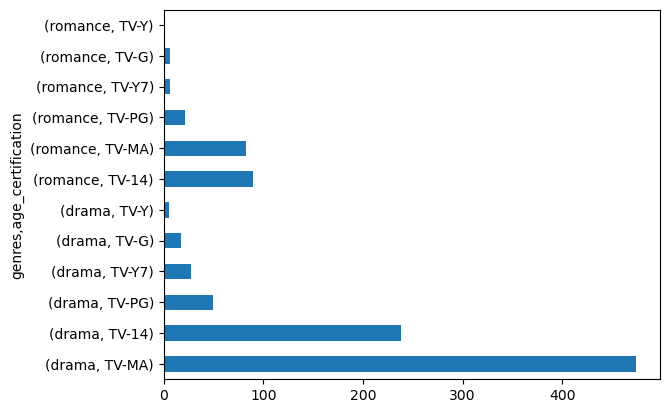

In [169]:
# Calculate number of maturity ratings of one genre
rating_genres[["drama", "romance"]].plot(kind="barh", stacked=True)


# Calculate the number of shows for each maturity rating within the top 10 genres


# Configure stacked bar chart
#figure1 = rating_genres.plot.barh(stacked="True", figsize=(10,10))

# xaxis= number of shows 
# yaxis = genre categories
# 6 maturity rating categories colour coded


Comparison of Maturity Rating with IMDB Scores - Which rating performed better?

In [294]:
# Filter DataFrame
imdb = exploded_genres[["age_certification", "imdb_score"]]

# Group by maturity rating and calculate the average IMDb score
rating_imdb = imdb.groupby('age_certification')['imdb_score'].mean().reset_index()

print(rating_imdb)

  age_certification  imdb_score
0             TV-14    7.273492
1              TV-G    6.482584
2             TV-MA    7.163897
3             TV-PG    7.004178
4              TV-Y    6.413913
5             TV-Y7    6.921327


<Figure size 1000x1000 with 0 Axes>

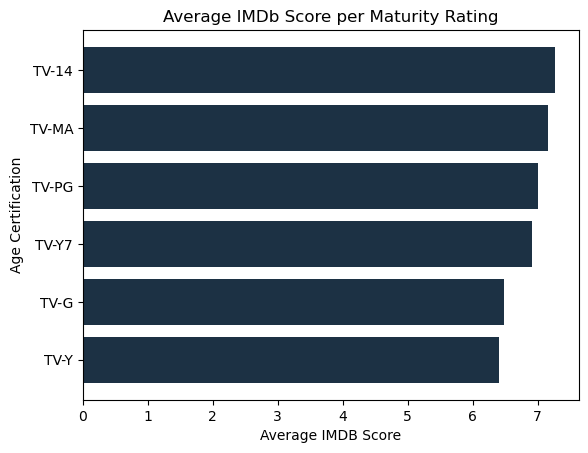

<Figure size 1000x1000 with 0 Axes>

In [310]:
# Sort table
rating_imdb = rating_imdb.sort_values(by=['imdb_score'])

# Configire horizontal bar plot
plt.barh(y=rating_imdb.age_certification, width=rating_imdb.imdb_score, color="#1C3144")

# Set labels and title
plt.xlabel('Average IMDB Score')
plt.ylabel('Age Certification')
plt.title('Average IMDb Score per Maturity Rating')
plt.figure(figsize=(10, 10))

Number of TV shows for each Maturity Rating Category

In [51]:
# Total age_certification count
rating_count = netflix_years["age_certification"].value_counts()

rating_count.head()
display(rating_count)

age_certification
TV-MA    735
TV-14    380
TV-PG    146
TV-Y7     90
TV-Y      77
TV-G      59
Name: count, dtype: int64

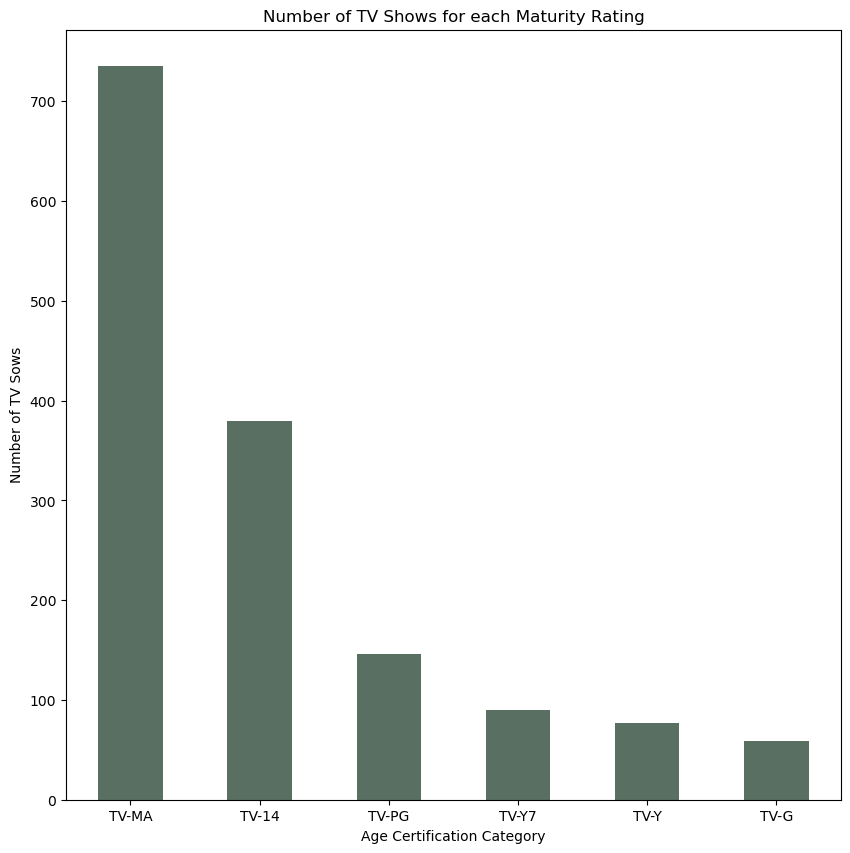

In [341]:
# Configure bar chart and labels
figure2 = rating_count.plot(kind="bar", figsize=(10,10),
                 title="Number of TV Shows for each Maturity Rating",
                 xlabel="Age Certification Category",
                 ylabel="Number of TV Sows",
                 color="#596F62")

# Configure x-tick rotation
xticklabels = rating_count.index
figure2.set_xticklabels(xticklabels, rotation=360)

plt.show()

Number Of Shows Produced Of The Most Popular Maturity Rating (TV-MA) Since 2007

Text(0, 0.5, 'Number of TV Shows')

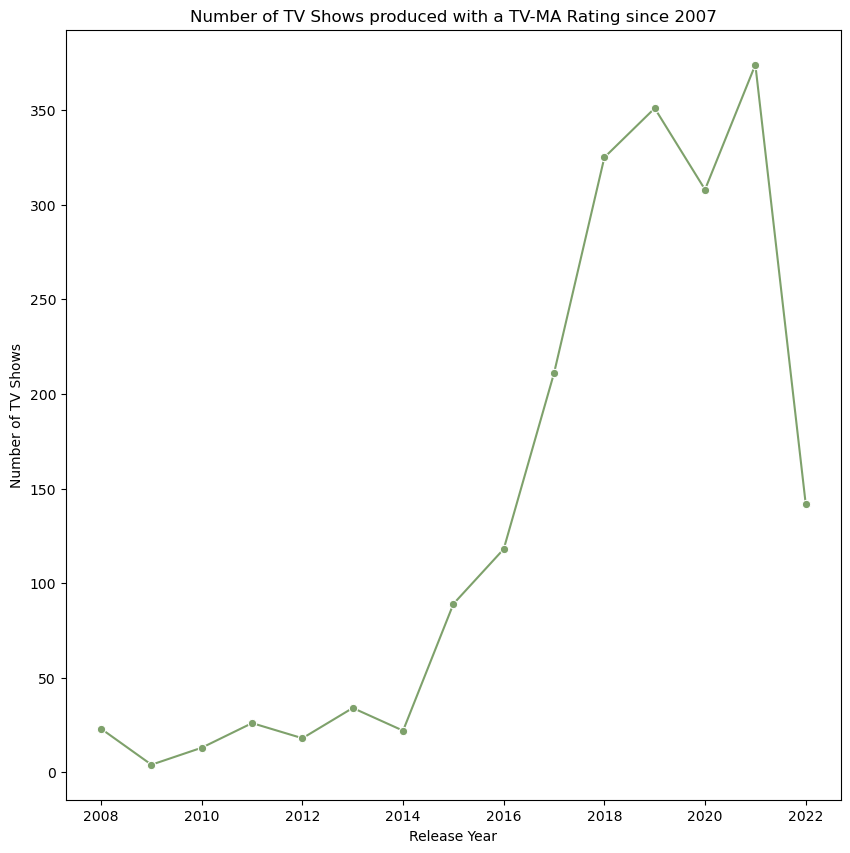

In [342]:
# Filter rows with TV-MA rating from 2007 onwards
maturity_rating = exploded_genres[exploded_genres["age_certification"].isin(["TV-MA"])]

# Count the number of TV-MA shows produced each year
tv_ma = maturity_rating.groupby("release_year").size().reset_index(name="show_number")

# Configure line plot
plt.figure(figsize=(10, 10))
sns.lineplot(x="release_year", y="show_number", data=tv_ma, marker='o', color='#7EA16B')
plt.title("Number of TV Shows produced with a TV-MA Rating since 2007")
plt.xlabel("Release Year")
plt.ylabel("Number of TV Shows")


Text(0, 0.5, 'Number of TV Shows')

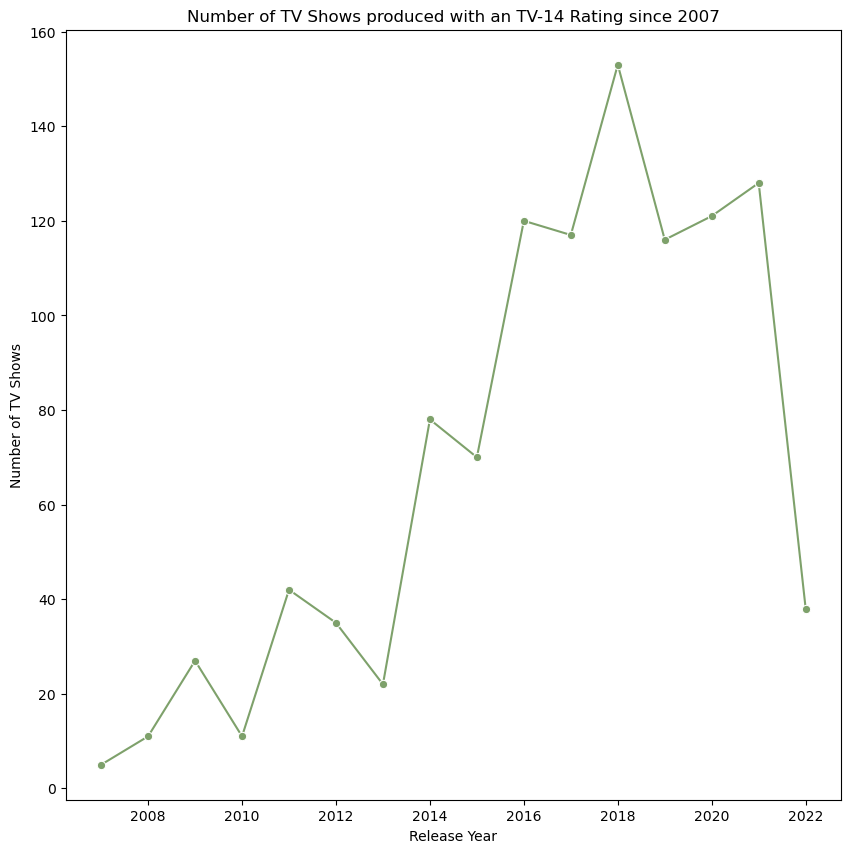

In [316]:
# Repeat process for TV-14

# Filter rows with TV-MA rating from 2007 onwards
maturity_rating = exploded_genres[exploded_genres["age_certification"].isin(["TV-14"])]

# Count the number of TV-MA shows produced each year
tv_ma = maturity_rating.groupby("release_year").size().reset_index(name="show_number")

# Configure line plot
plt.figure(figsize=(10, 10))
sns.lineplot(x="release_year", y="show_number", data=tv_ma, marker='o', color='#7EA16B')
plt.title("Number of TV Shows produced with an TV-14 Rating since 2007")
plt.xlabel("Release Year")
plt.ylabel("Number of TV Shows")

Text(0, 0.5, 'Number of TV Shows')

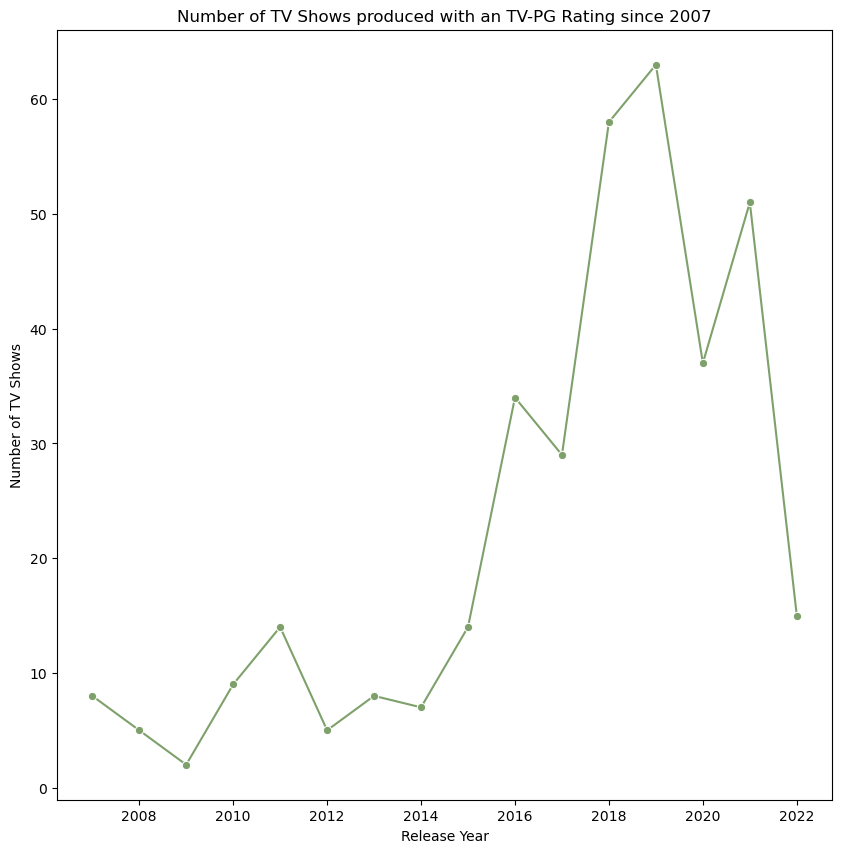

In [337]:
# Repeat process for TV-PG

# Filter rows with TV-MA rating from 2007 onwards
maturity_rating = exploded_genres[exploded_genres["age_certification"].isin(["TV-PG"])]

# Count the number of TV-MA shows produced each year
tv_ma = maturity_rating.groupby("release_year").size().reset_index(name="show_number")

# Configure line plot
plt.figure(figsize=(10, 10))
sns.lineplot(x="release_year", y="show_number", data=tv_ma, marker='o', color='#7EA16B')
plt.title("Number of TV Shows produced with an TV-PG Rating since 2007")
plt.xlabel("Release Year")
plt.ylabel("Number of TV Shows")

Text(0, 0.5, 'Number of TV Shows')

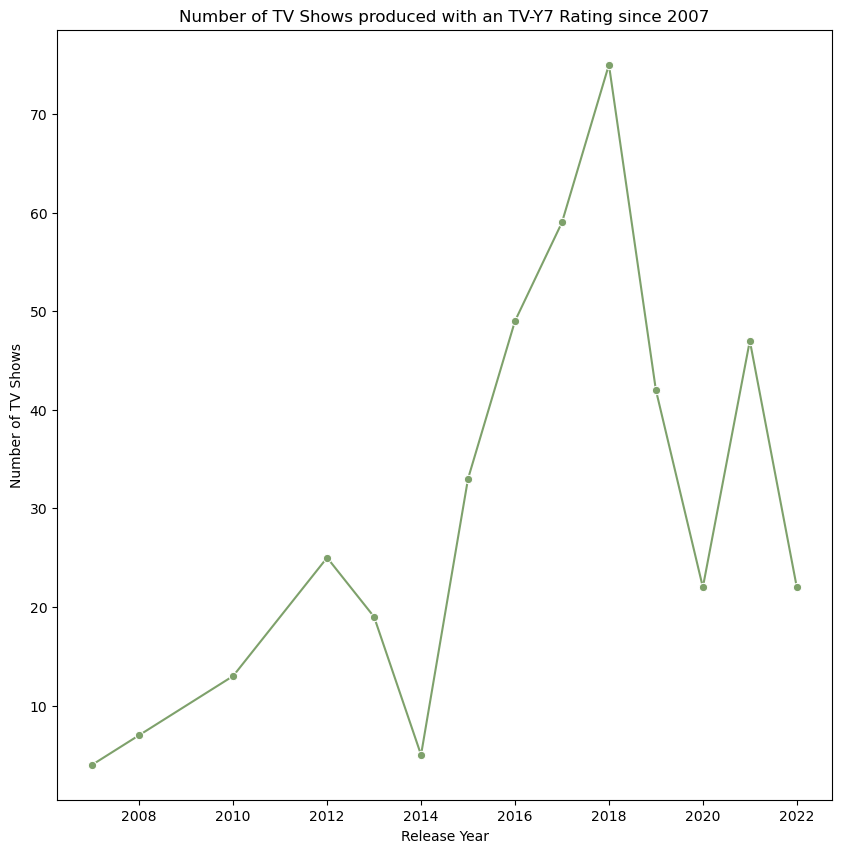

In [338]:
# Repeat process for TV-Y7

# Filter rows with TV-MA rating from 2007 onwards
maturity_rating = exploded_genres[exploded_genres["age_certification"].isin(["TV-Y7"])]

# Count the number of TV-MA shows produced each year
tv_ma = maturity_rating.groupby("release_year").size().reset_index(name="show_number")

# Configure line plot
plt.figure(figsize=(10, 10))
sns.lineplot(x="release_year", y="show_number", data=tv_ma, marker='o', color='#7EA16B')
plt.title("Number of TV Shows produced with an TV-Y7 Rating since 2007")
plt.xlabel("Release Year")
plt.ylabel("Number of TV Shows")

Text(0, 0.5, 'Number of TV Shows')

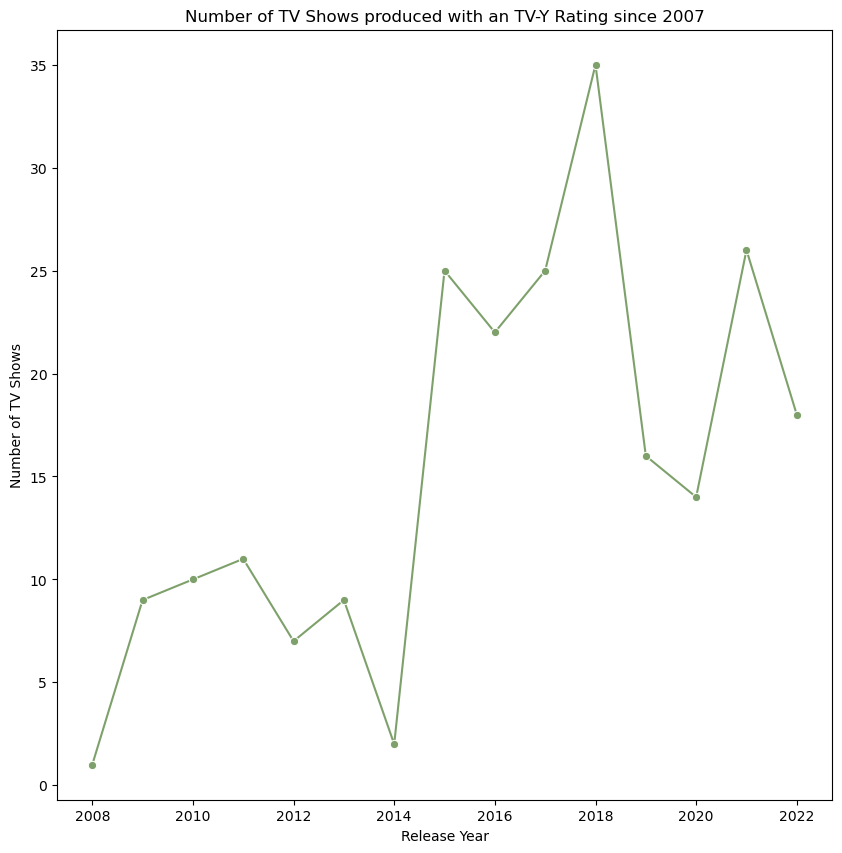

In [339]:
# Repeat process for TV-Y

# Filter rows with TV-MA rating from 2007 onwards
maturity_rating = exploded_genres[exploded_genres["age_certification"].isin(["TV-Y"])]

# Count the number of TV-MA shows produced each year
tv_ma = maturity_rating.groupby("release_year").size().reset_index(name="show_number")

# Configure line plot
plt.figure(figsize=(10, 10))
sns.lineplot(x="release_year", y="show_number", data=tv_ma, marker='o', color='#7EA16B')
plt.title("Number of TV Shows produced with an TV-Y Rating since 2007")
plt.xlabel("Release Year")
plt.ylabel("Number of TV Shows")

Text(0, 0.5, 'Number of TV Shows')

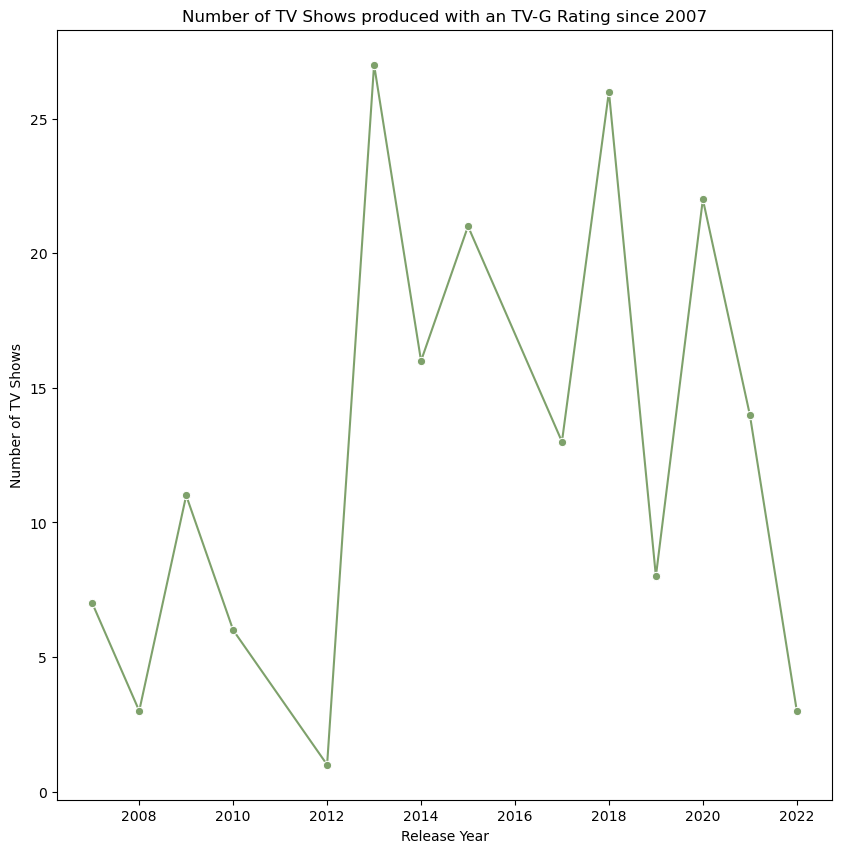

In [340]:
# Repeat process for TV-G

# Filter rows with TV-MA rating from 2007 onwards
maturity_rating = exploded_genres[exploded_genres["age_certification"].isin(["TV-G"])]

# Count the number of TV-MA shows produced each year
tv_ma = maturity_rating.groupby("release_year").size().reset_index(name="show_number")

# Configure line plot
plt.figure(figsize=(10, 10))
sns.lineplot(x="release_year", y="show_number", data=tv_ma, marker='o', color='#7EA16B')
plt.title("Number of TV Shows produced with an TV-G Rating since 2007")
plt.xlabel("Release Year")
plt.ylabel("Number of TV Shows")

Most Popular/Produced Maturity Rating Per Year Since 2007

In [258]:
# Filter DataFrame columns
maturity_years = exploded_genres[["age_certification", "release_year"]]

# Set index to age_certification for labelling
maturity_years = maturity_years.set_index("age_certification")

maturity_years.head()

,release_year
age_certification,
TV-MA,2008
TV-MA,2008
TV-MA,2008
TV-MA,2010
TV-MA,2010


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\ammar\AppData\Local\Temp\ipykernel_13440\949071026.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


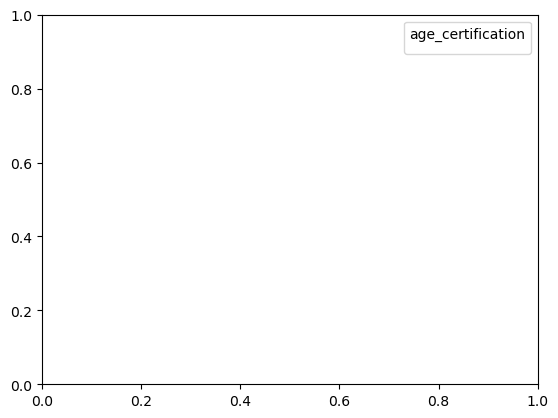

In [284]:
# Filter
maturity_years = exploded_genres[exploded_genres["age_certification"].isin(["TV-MA", "TV-14", "TV-PG", "TV-Y7", "TV-Y", "TV-G"])]

# Count the number of shows produced each year for every rating
#total_rating = maturity_years.groupby("release_year").size().reset_index(name="show_number")

# Configure line plot
#plt.figure(figsize=(10, 10))
#sns.lineplot(x="release_year", y="show_number", data=total_rating, marker='o', color='#7EA16B')
#plt.title("Number of TV Shows produced with an MA Rating since 2007")
#plt.xlabel("Release Year")
#plt.ylabel("Number of TV Shows")
#6 different color lines for each tv rating



Hypothesis Statement 1/Question Response 1:  

Conclusion and results of Figure1:

Final Analysis/Conclusion of Results/Findings: